## Description of the dataset

"The data set represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.

It is an inpatient encounter (a hospital admission). It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis. The length of stay was at least 1 day and at most 14 days. Laboratory tests were performed during the encounter. Medications were administered during the encounter. The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc."



### Target

The target variable is predicting whether a patient after treatment will be readmitted or not. If readmission is predicted then whether the readmission occurs in less than 30 days or wheter it will happen in more than 30 days.

We'll start with some initial observations and continue by addressing the different parts of ML challenge.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('diabetic_data.csv')

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


From the description.pdf file attached with the dataset we learn that encounter_id and patient_nbr are specific to every patient and as such are irrelevant from a prediction perspective. As such these columns will be dropped in the next step.

In [5]:
df = df.drop(['encounter_id', 'patient_nbr'], axis=1)

In [6]:
((df['weight'] == '?').sum())/df.shape[0]

0.9685847925633315

Also, the weight column is missing in 96.85%(see above) of the rows. If we keep weight column we risk losing performance because of regularization and/or overfitting in the patients which have weight information. As such the weight column is dropped aswell at this point.

In [7]:
df = df.drop('weight', axis=1)

In [8]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,?,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,?,?,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,?,?,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,?,?,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,?,?,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


From the included pdf, payer_code refers to the mode of payment(If insurance then company or self) for the hospital visit. As such, it's highly likely that this column does not contribute to the target variable and I drop this column aswell.

In [9]:
df = df.drop('payer_code', axis=1)

Now, we will convert all categorical features to their one-hot encoded equivalents. All variables except time_in_hospital and those prefixed with num are categorical. 

In [10]:
df.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [11]:
54864/(54864+35545+11357)

0.5391191557101586

## Metric Selection

Even though the classes are skewed, the skew is not so bad that we can't use accuracy. So, we will use accuracy as a primary measure for performance in this project. At times, we will also use the confusion matrix for reference.

In [12]:
cat_columns = []
num_columns = []
for i,c in enumerate(df.columns):
    if not(c=='time_in_hospital' or ('num' in str(c)) or 'readmitted'==c):
        cat_columns.append(c)
    elif c!= 'readmitted':
        num_columns.append(c)

In [13]:
num_columns

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

## Model Selection

I'll be using an ensemble of gradient boosting and random forest classifiers. I'm doing this because most of the data contains categorical features which are handled much better by tree based models. Also these models are usually among the best performing for any kind of structured data project. Finally, these models can also be used to interpret feature importance and help in feature engineering. 

In [14]:
import h2o


In [15]:
h2o.init(max_mem_size = "6G", min_mem_size='2G')             #specify max number of bytes. uses all cores by default.
h2o.remove_all()                          #clean slate, in case cluster was already running

from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.201-b09, mixed mode)
  Starting server from C:\ProgramData\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\archi\AppData\Local\Temp\tmpahlyo4_i
  JVM stdout: C:\Users\archi\AppData\Local\Temp\tmpahlyo4_i\h2o_archi_started_from_python.out
  JVM stderr: C:\Users\archi\AppData\Local\Temp\tmpahlyo4_i\h2o_archi_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.6
H2O cluster version age:,9 days
H2O cluster name:,H2O_from_python_archi_pn5jzj
H2O cluster total nodes:,1
H2O cluster free memory:,5.333 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [16]:

hf = h2o.H2OFrame(df)
for c in hf.types:
    if (not 'num' in c) and (not 'time' in c):
        hf[c] = hf[c].ascharacter().asfactor()
covtype_X = hf.col_names[:-1]     
covtype_y = hf.col_names[-1]    

train, valid, test = hf.split_frame([0.8, 0.1], seed=1234)


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [17]:
from h2o.grid.grid_search import H2OGridSearch

gbm_params1 = {'max_depth': [8],
                'sample_rate': [0.8, 1.0],
                'col_sample_rate':[0.2, 1.0],
                'ntrees': [20,50]}

# Train and validate a cartesian grid of GBMs
gbm_grid1 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid1',
                          hyper_params=gbm_params1)
gbm_grid1.train(covtype_X, covtype_y,
                training_frame=train,
                validation_frame=valid,
                seed=1)



gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [18]:
gbm_gridperf1 = gbm_grid1.get_grid(sort_by='accuracy', decreasing=True)
gbm_gridperf1

    col_sample_rate max_depth ntrees sample_rate          model_ids  \
0               0.2         8     50         0.8  gbm_grid1_model_3   
1               0.2         8     20         1.0  gbm_grid1_model_5   
2               0.2         8     50         1.0  gbm_grid1_model_7   
3               0.2         8     20         0.8  gbm_grid1_model_1   
4               1.0         8     50         0.8  gbm_grid1_model_4   
5               1.0         8     20         0.8  gbm_grid1_model_2   
6               1.0         8     20         1.0  gbm_grid1_model_6   
7               1.0         8     50         1.0  gbm_grid1_model_8   

             accuracy  
0  0.5862205503860622  
1  0.5842407444070481  
2  0.5841417541080974  
3  0.5825579093248862  
4   0.576321520490992  
5  0.5759255592951891  
6  0.5741437339140765  
7  0.5718669570382102  


The computer that I have access to right now isn't capable of doing gridsearch for random forest and as such the below mentioned parameters are only for demonstration purpose

In [19]:
rf_params2 = {
                'max_depth': [35, 50],
                'sample_rate': [0.8],
                'ntrees': [50]}

rf_grid2 = H2OGridSearch(model=H2ORandomForestEstimator,
                          grid_id='rf_grid01',
                          hyper_params=rf_params2)
rf_grid2.train(covtype_X, covtype_y,
                training_frame=train,
                validation_frame=valid,
                seed=1)



drf Grid Build progress: |████████████████████████████████████████████████| 100%


In [20]:
rf_gridperf2 = rf_grid2.get_grid(sort_by='accuracy', decreasing=True)


In [21]:
rf_gridperf2

    max_depth ntrees sample_rate          model_ids            accuracy
0          35     50         0.8  rf_grid01_model_1  0.5843397347059989
1          50     50         0.8  rf_grid01_model_2  0.5837457929122947


In [23]:
best_rf = rf_gridperf2.models[0]
best_gbm = gbm_gridperf1.models[0]

In [24]:
h2o.save_model(best_rf, 'rf.h5', force=True)
h2o.save_model(best_gbm, 'gbm.h5', force=True)

'C:\\Users\\archi\\Documents\\Blockchain Data Science\\rf.h5\\rf_grid01_model_1'

In [25]:
best_rf 

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_grid01_model_1


ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.32658035546868247
RMSE: 0.5714720950918623
LogLoss: 2.580572802664398
Mean Per-Class Error: 0.5966157248816008
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



<30,>30,NO,Error,Rate
335.0,3211.0,5525.0,0.9630691,"8,736 / 9,071"
442.0,10115.0,17752.0,0.6426931,"18,194 / 28,309"
335.0,7764.0,35897.0,0.1840849,"8,099 / 43,996"
1112.0,21090.0,59174.0,0.4304586,"35,029 / 81,376"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.5695414
2,0.8658327
3,1.0



ModelMetricsMultinomial: drf
** Reported on validation data. **

MSE: 0.31356047819246036
RMSE: 0.5599647115599878
LogLoss: 0.9552816681283798
Mean Per-Class Error: 0.5863303153948632
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



<30,>30,NO,Error,Rate
22.0,447.0,692.0,0.9810508,"1,139 / 1,161"
28.0,1358.0,2175.0,0.6186464,"2,203 / 3,561"
17.0,840.0,4523.0,0.1592937,"857 / 5,380"
67.0,2645.0,7390.0,0.4156603,"4,199 / 10,102"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.5843397
2,0.8889329
3,1.0


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
,2019-03-23 01:29:08,0.034 sec,0.0,nan,nan,nan,nan,nan,nan
,2019-03-23 01:29:08,0.787 sec,1.0,0.7498229,17.7534856,0.4728929,0.7514561,17.8405163,0.5077212
,2019-03-23 01:29:09,1.493 sec,2.0,0.7390116,16.9545181,0.4687511,0.6557256,10.9507502,0.4800040
,2019-03-23 01:29:10,2.215 sec,3.0,0.7305912,16.3009381,0.4658278,0.6165743,7.6346078,0.4652544
,2019-03-23 01:29:11,2.996 sec,4.0,0.7210758,15.5641012,0.4653082,0.5969492,5.7431604,0.4549594
,2019-03-23 01:29:11,3.800 sec,5.0,0.7117882,14.8500572,0.4634578,0.5875273,4.6100875,0.4473372
,2019-03-23 01:29:16,8.673 sec,10.0,0.6702303,11.6000696,0.4573134,0.5703507,2.3287859,0.4357553
,2019-03-23 01:29:21,12.887 sec,14.0,0.6430906,9.4177635,0.4546062,0.5668297,1.7815317,0.4287270
,2019-03-23 01:29:25,16.965 sec,18.0,0.6222401,7.6764691,0.4482461,0.5648875,1.4374421,0.4247674
,2019-03-23 01:29:29,21.161 sec,22.0,0.6075139,6.3576648,0.4458504,0.5633626,1.2748622,0.4197189


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
diag_1,359608.9062500,1.0,0.1992343
diag_2,334691.5937500,0.9307100,0.1854294
diag_3,333788.1875000,0.9281978,0.1849289
medical_specialty,75228.3984375,0.2091950,0.0416788
discharge_disposition_id,73522.8437500,0.2044522,0.0407339
---,---,---,---
acetohexamide,8.6069517,0.0000239,0.0000048
troglitazone,5.6771250,0.0000158,0.0000031
metformin-rosiglitazone,2.7985322,0.0000078,0.0000016
metformin-pioglitazone,2.6670983,0.0000074,0.0000015



See the whole table with table.as_data_frame()


In [26]:
best_gbm 

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_grid1_model_3


ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.21065996258124522
RMSE: 0.45897708284972705
LogLoss: 0.6145000177691974
Mean Per-Class Error: 0.3548623756570104
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



<30,>30,NO,Error,Rate
3155.0,2273.0,3643.0,0.6521883,"5,916 / 9,071"
27.0,18750.0,9532.0,0.3376665,"9,559 / 28,309"
19.0,3269.0,40709.0,0.0747324,"3,288 / 43,997"
3201.0,24292.0,53884.0,0.2305688,"18,763 / 81,377"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.7694312
2,0.9451319
3,1.0



ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 0.3158629220264905
RMSE: 0.5620168342910117
LogLoss: 0.8820410148762089
Mean Per-Class Error: 0.5790187970694485
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



<30,>30,NO,Error,Rate
38.0,438.0,685.0,0.9672696,"1,123 / 1,161"
28.0,1438.0,2095.0,0.5961808,"2,123 / 3,561"
27.0,907.0,4446.0,0.1736059,"934 / 5,380"
93.0,2783.0,7226.0,0.4137794,"4,180 / 10,102"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.5862206
2,0.8910117
3,1.0


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
,2019-03-23 00:31:24,14.770 sec,0.0,0.6666667,1.0986123,0.5745972,0.6666667,1.0986123,0.5751336
,2019-03-23 00:31:24,15.023 sec,1.0,0.6512182,1.0541188,0.3887585,0.6539440,1.0620566,0.4360523
,2019-03-23 00:31:24,15.169 sec,2.0,0.6372166,1.0162525,0.3789400,0.6425562,1.0313887,0.4287270
,2019-03-23 00:31:24,15.323 sec,3.0,0.6240506,0.9824376,0.3683596,0.6323638,1.0055570,0.4244704
,2019-03-23 00:31:24,15.476 sec,4.0,0.6134970,0.9564034,0.3659019,0.6244158,0.9863276,0.4242724
---,---,---,---,---,---,---,---,---,---
,2019-03-23 00:31:27,18.295 sec,26.0,0.5047058,0.7146517,0.2879806,0.5681703,0.8812367,0.4156603
,2019-03-23 00:31:27,18.413 sec,27.0,0.5021475,0.7090699,0.2848716,0.5675579,0.8806144,0.4159572
,2019-03-23 00:31:28,18.557 sec,28.0,0.5001099,0.7047159,0.2825245,0.5672015,0.8806553,0.4164522
,2019-03-23 00:31:28,18.679 sec,29.0,0.4980955,0.7002332,0.2804847,0.5668353,0.8807038,0.4158582



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
diag_1,22092.6503906,1.0,0.2713572
diag_3,19455.0605469,0.8806123,0.2389605
diag_2,18220.2773438,0.8247212,0.2237940
number_inpatient,6025.6474609,0.2727444,0.0740112
discharge_disposition_id,4548.3085938,0.2058743,0.0558655
---,---,---,---
tolazamide,0.0,0.0,0.0
glipizide-metformin,0.0,0.0,0.0
glimepiride-pioglitazone,0.0,0.0,0.0
metformin-rosiglitazone,0.0,0.0,0.0



See the whole table with table.as_data_frame()


GB seems to overfit and DRF underfit. We will investigate later.

In [46]:
pred_gbm = best_gbm.predict(valid)
pred_rf = best_rf.predict(valid)

gbm prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


In [47]:
td = valid.as_data_frame()
td2 = valid.as_data_frame()

In [48]:
for i in range(0,21):
    pred = i/20*pred_gbm + (1-i/20)*pred_rf
    pred1= pred.as_data_frame()
    p1 = pred1.iloc[:, 1:]
    td.iloc[td.index[p1['NO'] == np.amax(p1.values, axis=1)],-1] = 'NO'
    td.iloc[td.index[p1['>30'] == np.amax(p1.values, axis=1)],-1] = '>30'
    td.iloc[td.index[p1['<30'] == np.amax(p1.values, axis=1)],-1] = '<30'
    print((((td2 == td)['readmitted']).sum())/(td2['readmitted'].count()), i)

0.5844387250049495 0
0.5848346862007523 1
0.5857255988913086 2
0.5864185309839636 3
0.586616511581865 4
0.5868144921797663 5
0.5868144921797663 6
0.5862205503860621 7
0.5869134824787171 8
0.5872104533755692 9
0.5880023757671748 10
0.5874084339734706 11
0.5874084339734706 12
0.5878043951692734 13
0.5865175212829142 14
0.5864185309839636 15
0.5878043951692734 16
0.588596317560879 17
0.5870124727776678 18
0.5868144921797663 19
0.5862205503860621 20


## Feature Engineering and Selection

Let's look at feature importance first up

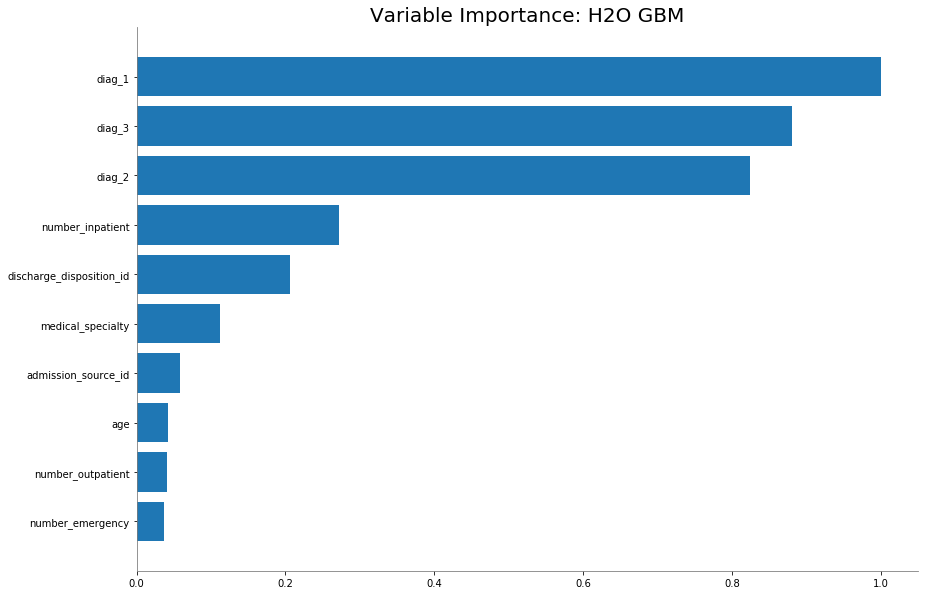

In [49]:
best_gbm.varimp_plot()

The diagnoses appear to be very important, however there are 900+ unique values for each which leads to massive overfit potential. Let's try without these.

In [50]:
best_gbm.train(list(set(train.col_names) - set(['readmitted','diag_1', 'diag_2', 'diag_3'])), covtype_y,
                training_frame=train,
                validation_frame=valid)


gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [51]:
best_gbm

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1553284516351_1


ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.3068433721025032
RMSE: 0.5539344474777708
LogLoss: 0.8459630969996649
Mean Per-Class Error: 0.56834166711242
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



<30,>30,NO,Error,Rate
500.0,3219.0,5352.0,0.9448793,"8,571 / 9,071"
119.0,10520.0,17670.0,0.6283867,"17,789 / 28,309"
69.0,5728.0,38200.0,0.1317590,"5,797 / 43,997"
688.0,19467.0,61222.0,0.3951608,"32,157 / 81,377"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.6048392
2,0.9005861
3,1.0



ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 0.31773299302222585
RMSE: 0.5636780934382902
LogLoss: 0.8738053258299059
Mean Per-Class Error: 0.5837661164912307
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



<30,>30,NO,Error,Rate
38.0,430.0,693.0,0.9672696,"1,123 / 1,161"
25.0,1288.0,2248.0,0.6383038,"2,273 / 3,561"
16.0,768.0,4596.0,0.1457249,"784 / 5,380"
79.0,2486.0,7537.0,0.4137794,"4,180 / 10,102"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.5862206
2,0.8951693
3,1.0


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
,2019-03-23 01:32:44,0.034 sec,0.0,0.6666667,1.0986123,0.5720412,0.6666667,1.0986123,0.5742427
,2019-03-23 01:32:44,0.369 sec,1.0,0.6535805,1.0608454,0.4209912,0.6539796,1.0620021,0.4274401
,2019-03-23 01:32:44,0.665 sec,2.0,0.6422406,1.0302608,0.4200696,0.6429967,1.0323965,0.4257573
,2019-03-23 01:32:45,0.943 sec,3.0,0.6324232,1.0052059,0.4198975,0.6335096,1.0082221,0.4255593
,2019-03-23 01:32:45,1.183 sec,4.0,0.6239090,0.9844605,0.4199835,0.6253536,0.9884154,0.4264502
---,---,---,---,---,---,---,---,---,---
,2019-03-23 01:32:48,3.732 sec,22.0,0.5674415,0.8692769,0.4066260,0.5729774,0.8845596,0.4173431
,2019-03-23 01:32:48,3.861 sec,23.0,0.5664128,0.8676548,0.4064908,0.5721238,0.8834753,0.4170461
,2019-03-23 01:32:48,3.999 sec,24.0,0.5654485,0.8660373,0.4058395,0.5713546,0.8824353,0.4171451
,2019-03-23 01:32:52,8.105 sec,47.0,0.5546023,0.8473677,0.3959104,0.5639998,0.8741028,0.4144724



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
number_inpatient,8327.2812500,1.0,0.3184671
discharge_disposition_id,5512.3364258,0.6619611,0.2108128
medical_specialty,3200.0964355,0.3842907,0.1223839
admission_source_id,1404.1108398,0.1686158,0.0536986
number_diagnoses,1390.5153809,0.1669831,0.0531786
---,---,---,---
tolazamide,0.0,0.0,0.0
glipizide-metformin,0.0,0.0,0.0
glimepiride-pioglitazone,0.0,0.0,0.0
metformin-rosiglitazone,0.0,0.0,0.0



See the whole table with table.as_data_frame()


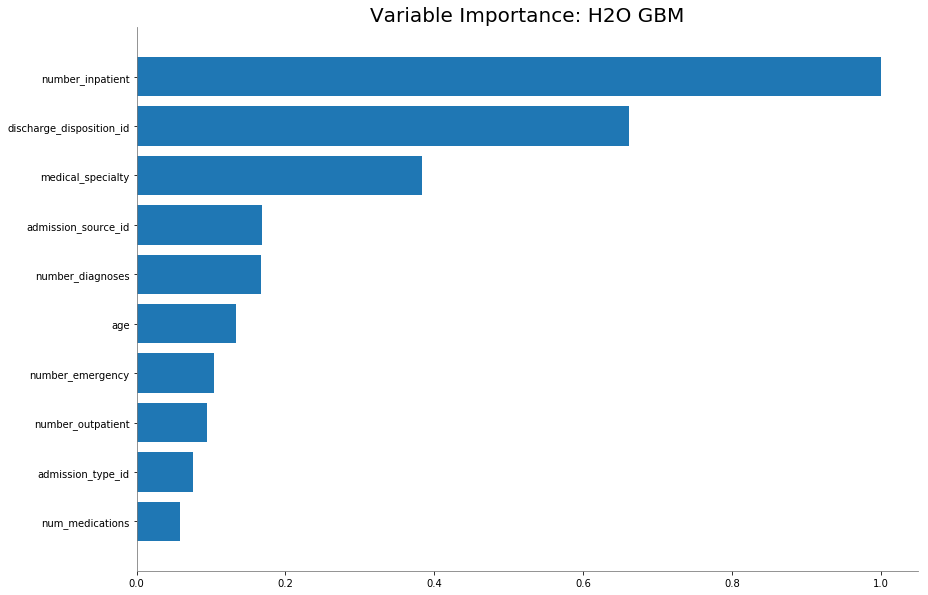

In [52]:
best_gbm.varimp_plot()

Expectedly, our error on validation set decreases.


Create feature from combination of diagnoses

In [53]:
interaction_cols1 = ['diag_3', 'diag_2', 'diag_1']

train_cols = train.interaction(factors=interaction_cols1,    #Generate pairwise columns
                               pairwise=False,
                               max_factors=1000,
                               min_occurrence=100)
valid_cols = valid.interaction(factors=interaction_cols1,
                               pairwise=False,
                               max_factors=1000,
                               min_occurrence=100)
test_cols = test.interaction(factors=interaction_cols1,
                               pairwise=False,
                               max_factors=1000,
                               min_occurrence=100)
train = train.cbind(train_cols)                              #Append pairwise columns to H2OFrames
valid = valid.cbind(valid_cols)
test = test.cbind(test_cols)



Interactions progress: |██████████████████████████████████████████████████| 100%
Interactions progress: |██████████████████████████████████████████████████| 100%
Interactions progress: |██████████████████████████████████████████████████| 100%


In [54]:
best_gbm.train(list(set(train.col_names) - set(['readmitted','diag_1', 'diag_2', 'diag_3'])), covtype_y,
                training_frame=train,
                validation_frame=valid)
best_gbm

gbm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1553284516351_2


ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.29921448329429895
RMSE: 0.5470050121290471
LogLoss: 0.8276237333387567
Mean Per-Class Error: 0.5530332108524357
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



<30,>30,NO,Error,Rate
646.0,3187.0,5238.0,0.9287840,"8,425 / 9,071"
117.0,11248.0,16944.0,0.6026705,"17,061 / 28,309"
77.0,5539.0,38381.0,0.1276451,"5,616 / 43,997"
840.0,19974.0,60563.0,0.3821964,"31,102 / 81,377"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.6178036
2,0.9039532
3,1.0



ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 0.31772490490541044
RMSE: 0.563670918981466
LogLoss: 0.8751189455641554
Mean Per-Class Error: 0.5812421408128647
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



<30,>30,NO,Error,Rate
41.0,425.0,695.0,0.9646856,"1,120 / 1,161"
24.0,1319.0,2218.0,0.6295984,"2,242 / 3,561"
17.0,787.0,4576.0,0.1494424,"804 / 5,380"
82.0,2531.0,7489.0,0.4123936,"4,166 / 10,102"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.5876064
2,0.8955653
3,1.0


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
,2019-03-23 01:33:04,0.037 sec,0.0,0.6666667,1.0986123,0.5744744,0.6666667,1.0986123,0.5798852
,2019-03-23 01:33:04,0.189 sec,1.0,0.6534247,1.0603854,0.4217408,0.6538941,1.0617613,0.4277371
,2019-03-23 01:33:05,0.316 sec,2.0,0.6419766,1.0295105,0.4195043,0.6428328,1.0319891,0.4267472
,2019-03-23 01:33:05,0.443 sec,3.0,0.6320126,1.0040614,0.4178085,0.6332717,1.0076855,0.4257573
,2019-03-23 01:33:05,0.571 sec,4.0,0.6233700,0.9829749,0.4173784,0.6251888,0.9881134,0.4253613
---,---,---,---,---,---,---,---,---,---
,2019-03-23 01:33:08,3.657 sec,22.0,0.5641421,0.8605399,0.4008258,0.5730004,0.8853393,0.4198179
,2019-03-23 01:33:08,3.850 sec,23.0,0.5629590,0.8584031,0.4000516,0.5720927,0.8840322,0.4190259
,2019-03-23 01:33:08,4.036 sec,24.0,0.5618233,0.8564150,0.3987122,0.5713176,0.8830709,0.4185310
,2019-03-23 01:33:12,8.129 sec,46.0,0.5483802,0.8307279,0.3839168,0.5641021,0.8754754,0.4117996



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
number_inpatient,8213.6171875,1.0,0.2661060
diag_3_diag_2_diag_1,7598.7177734,0.9251366,0.2461844
discharge_disposition_id,5313.1323242,0.6468688,0.1721357
medical_specialty,2633.3588867,0.3206089,0.0853160
admission_source_id,1292.3270264,0.1573396,0.0418690
---,---,---,---
tolazamide,0.0,0.0,0.0
glipizide-metformin,0.0,0.0,0.0
glimepiride-pioglitazone,0.0,0.0,0.0
metformin-rosiglitazone,0.0,0.0,0.0



See the whole table with table.as_data_frame()


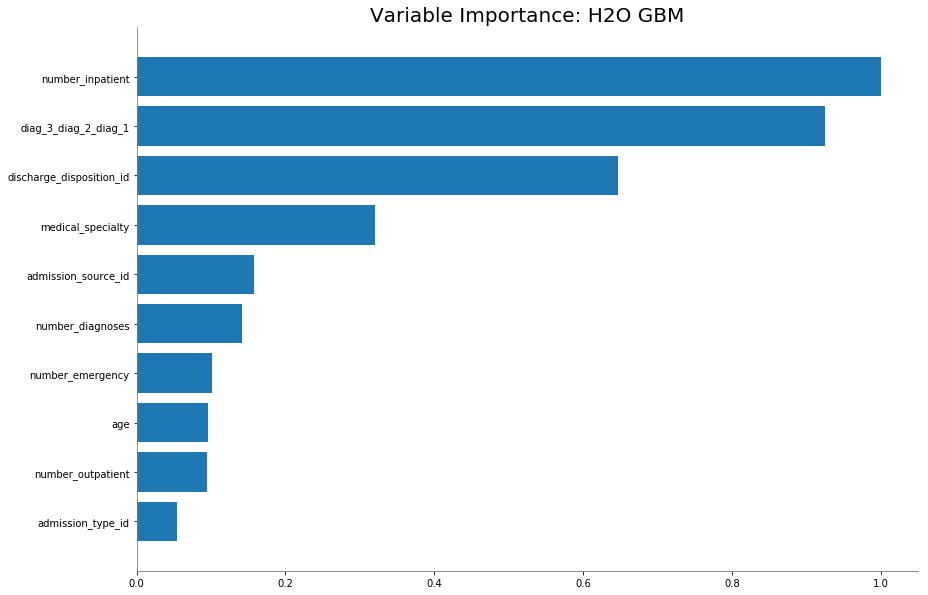

In [55]:
best_gbm.varimp_plot()

We see a further decrease in the validation set error.

In [56]:
medicines = np.array(best_gbm.varimp()[-20:])

In [57]:
medicines=medicines[:, 0]

In [61]:
best_gbm.train(list(set(train.col_names) - set(['readmitted','diag_1', 'diag_2', 'diag_3']) - set(medicines)), covtype_y,
                training_frame=train,
                validation_frame=valid)
best_gbm

gbm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1553284516351_5


ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.2991307847653042
RMSE: 0.5469285005970197
LogLoss: 0.8275123245203799
Mean Per-Class Error: 0.5528546481047192
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



<30,>30,NO,Error,Rate
638.0,3189.0,5244.0,0.9296660,"8,433 / 9,071"
111.0,11301.0,16897.0,0.6007983,"17,008 / 28,309"
78.0,5558.0,38361.0,0.1280996,"5,636 / 43,997"
827.0,20048.0,60502.0,0.3818892,"31,077 / 81,377"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.6181108
2,0.9041744
3,1.0



ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 0.31760629629761655
RMSE: 0.5635656982975601
LogLoss: 0.8749692429862734
Mean Per-Class Error: 0.5810804925610521
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



<30,>30,NO,Error,Rate
38.0,430.0,693.0,0.9672696,"1,123 / 1,161"
22.0,1320.0,2219.0,0.6293176,"2,241 / 3,561"
14.0,775.0,4591.0,0.1466543,"789 / 5,380"
74.0,2525.0,7503.0,0.4111067,"4,153 / 10,102"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.5888933
2,0.8955653
3,1.0


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
,2019-03-23 01:33:50,0.020 sec,0.0,0.6666667,1.0986123,0.5764651,0.6666667,1.0986123,0.5686993
,2019-03-23 01:33:50,0.106 sec,1.0,0.6534247,1.0603854,0.4217408,0.6538941,1.0617613,0.4277371
,2019-03-23 01:33:50,0.176 sec,2.0,0.6419766,1.0295105,0.4195043,0.6428328,1.0319891,0.4267472
,2019-03-23 01:33:50,0.257 sec,3.0,0.6320126,1.0040614,0.4178085,0.6332717,1.0076855,0.4257573
,2019-03-23 01:33:50,0.336 sec,4.0,0.6233700,0.9829749,0.4173784,0.6251888,0.9881134,0.4253613
---,---,---,---,---,---,---,---,---,---
,2019-03-23 01:33:54,3.568 sec,40.0,0.5509232,0.8361600,0.3877877,0.5650385,0.8764217,0.4138784
,2019-03-23 01:33:54,3.685 sec,41.0,0.5504306,0.8351471,0.3868784,0.5648465,0.8762807,0.4127895
,2019-03-23 01:33:54,3.805 sec,42.0,0.5499844,0.8341874,0.3864728,0.5646965,0.8761785,0.4124926
,2019-03-23 01:33:54,3.925 sec,43.0,0.5496068,0.8333520,0.3858584,0.5645608,0.8760205,0.4129875



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
number_inpatient,8214.6777344,1.0,0.2660553
diag_3_diag_2_diag_1,7589.8188477,0.9239339,0.2458175
discharge_disposition_id,5351.5639648,0.6514637,0.1733253
medical_specialty,2648.9838867,0.3224696,0.0857947
admission_source_id,1290.1549072,0.1570548,0.0417853
---,---,---,---
num_procedures,122.1229401,0.0148664,0.0039553
metformin,94.8217773,0.0115430,0.0030711
A1Cresult,90.8792419,0.0110630,0.0029434
max_glu_serum,43.3879356,0.0052818,0.0014052



See the whole table with table.as_data_frame()


Removing these essentially useless features further improves our model's performance. We have also eliminated most of the overfitting problem.

In [59]:
removed_features = set(['readmitted','diag_1', 'diag_2', 'diag_3'])
removed_features = removed_features.union(set(medicines))

Let's retrain the random forest aswell.

In [62]:
best_rf.train(list(set(train.col_names) - set(['readmitted','diag_1', 'diag_2', 'diag_3']) - set(medicines)), covtype_y,
                training_frame=train,
                validation_frame=valid)


drf Model Build progress: |███████████████████████████████████████████████| 100%


In [73]:
best_rf

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1553284516351_6


ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.316581176273969
RMSE: 0.5626554685364472
LogLoss: 0.8970205915027385
Mean Per-Class Error: 0.5871972608981265
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



<30,>30,NO,Error,Rate
369.0,3320.0,5382.0,0.9593209,"8,702 / 9,071"
323.0,10153.0,17833.0,0.6413508,"18,156 / 28,309"
183.0,6897.0,36917.0,0.1609201,"7,080 / 43,997"
875.0,20370.0,60132.0,0.4170466,"33,938 / 81,377"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.5829534
2,0.8903499
3,1.0



ModelMetricsMultinomial: drf
** Reported on validation data. **

MSE: 0.31605992917925785
RMSE: 0.562192074987951
LogLoss: 0.8772703541382872
Mean Per-Class Error: 0.582912938718951
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



<30,>30,NO,Error,Rate
38.0,455.0,668.0,0.9672696,"1,123 / 1,161"
20.0,1313.0,2228.0,0.6312833,"2,248 / 3,561"
12.0,796.0,4572.0,0.1501859,"808 / 5,380"
70.0,2564.0,7468.0,0.4136805,"4,179 / 10,102"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.5863196
2,0.8943773
3,1.0


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
,2019-03-23 01:33:59,0.020 sec,0.0,nan,nan,nan,nan,nan,nan
,2019-03-23 01:33:59,0.240 sec,1.0,0.6478950,8.6634833,0.4800577,0.6438013,8.1609092,0.4835676
,2019-03-23 01:33:59,0.434 sec,2.0,0.6362837,7.5685758,0.4744624,0.5938399,3.5551476,0.4629776
,2019-03-23 01:33:59,0.607 sec,3.0,0.6224131,6.2354153,0.4670395,0.5797562,1.9578463,0.4457533
,2019-03-23 01:34:00,0.808 sec,4.0,0.6122358,5.2898131,0.4624551,0.5743718,1.4227421,0.4386260
,2019-03-23 01:34:00,1.124 sec,5.0,0.6057839,4.6232092,0.4596597,0.5712789,1.1676336,0.4313997
,2019-03-23 01:34:00,1.433 sec,6.0,0.5992014,3.9516163,0.4562091,0.5694738,1.0425400,0.4282320
,2019-03-23 01:34:00,1.763 sec,7.0,0.5942237,3.4824036,0.4523397,0.5684232,1.0039635,0.4281330
,2019-03-23 01:34:01,2.144 sec,8.0,0.5893646,3.0188883,0.4494223,0.5674646,0.9785723,0.4255593
,2019-03-23 01:34:01,2.474 sec,9.0,0.5854985,2.6552549,0.4458072,0.5665667,0.9397936,0.4214017


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
diag_3_diag_2_diag_1,152065.3437500,1.0,0.2095225
medical_specialty,63571.3164062,0.4180526,0.0875914
discharge_disposition_id,61543.9257812,0.4047203,0.0847980
number_inpatient,57721.2929688,0.3795822,0.0795310
num_lab_procedures,47469.4218750,0.3121646,0.0654055
---,---,---,---
number_emergency,11606.2880859,0.0763243,0.0159917
gender,10920.6972656,0.0718158,0.0150470
metformin,10327.8134766,0.0679169,0.0142301
diabetesMed,7291.2446289,0.0479481,0.0100462



See the whole table with table.as_data_frame()


These changes in features also worked for the random forest and underfitting has improved considerably as well.

In [63]:
pred_gbm = best_gbm.predict(valid)
pred_rf = best_rf.predict(valid)


gbm prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


In [64]:
for i in range(0,21):
    pred = i/20*pred_gbm + (1-i/20)*pred_rf
    pred1= pred.as_data_frame()
    p1 = pred1.iloc[:, 1:]
    td.iloc[td.index[p1['NO'] == np.amax(p1.values, axis=1)],-1] = 'NO'
    td.iloc[td.index[p1['>30'] == np.amax(p1.values, axis=1)],-1] = '>30'
    td.iloc[td.index[p1['<30'] == np.amax(p1.values, axis=1)],-1] = '<30'
    print((((td2 == td)['readmitted']).sum())/(td2['readmitted'].count()), i)

0.5863195406850129 0
0.5862205503860621 1
0.5867155018808157 2
0.5878043951692734 3
0.5888932884577311 4
0.5893882399524847 5
0.5889922787566818 6
0.5887942981587805 7
0.5891902593545832 8
0.5892892496535339 9
0.5897842011482874 10
0.590279152643041 11
0.590279152643041 12
0.5908730944367452 13
0.5906751138388437 14
0.5903781429419916 15
0.5911700653335973 16
0.5914670362304494 17
0.5901801623440903 18
0.5891902593545832 19
0.5888932884577311 20


In [65]:
pred_gbm = best_gbm.predict(test)
pred_rf = best_rf.predict(test)

gbm prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


In [66]:
td2 = test.as_data_frame()
td = test.as_data_frame()

In [72]:
i=17
pred = i/20*pred_gbm + (1-i/20)*pred_rf
pred1= pred.as_data_frame()
p1 = pred1.iloc[:, 1:]
td.iloc[td.index[p1['NO'] == np.amax(p1.values, axis=1)],-2] = 'NO'
td.iloc[td.index[p1['>30'] == np.amax(p1.values, axis=1)],-2] = '>30'
td.iloc[td.index[p1['<30'] == np.amax(p1.values, axis=1)],-2] = '<30'
print((((td2 == td)['readmitted']).sum())/(td2['readmitted'].count()), i)

0.5899679206765821 17


The final accuracy on test set is 58.99%
